# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 5_Machine Learning Overview and Algorithm

## 3. Kmeans Clustering



**Contents of this note refer to 1) Python Data Science Handbook (https://cocalc.com/share/public_paths/8b892baf91f98d0cf6172b872c8ad6694d0f7204/notebooks%2F05.11-K-Means.ipynb); 2) book "Python Machine Learning"; 3) textbook "Data Science from Scratch"; 4) Dr. Robert Michael Lewis's teaching materials at Department of Computer Science, William & Mary; 5) Python toturial: https://docs.python.org/3/tutorial/**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

**Note: The contents of this note are mainly from https://cocalc.com/share/public_paths/8b892baf91f98d0cf6172b872c8ad6694d0f7204/notebooks%2F05.11-K-Means.ipynb**

## Introducing k-Means

The *k*-means algorithm (already know our clusters - have to give it # of k) searches for a pre-determined number of clusters within an **unlabeled** (unsupervised) multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [1]:
# If you dont know k - need to know the distance threshold
# k-means is unsupervised (clustering)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

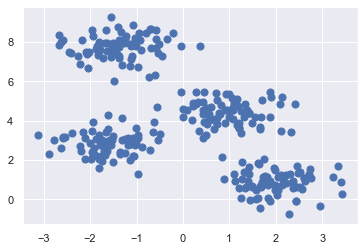

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0) # 300 samples, 4 clusters

plt.scatter(X[:, 0], X[:, 1], s=50); 

It is relatively easy to pick out the four clusters.
The *k*-means algorithm does this as following:

In [3]:
from sklearn.cluster import KMeans # Use KMeans
kmeans = KMeans(n_clusters=4) # 4 clusteres
kmeans.fit(X) # Train
y_kmeans = kmeans.predict(X) # Predict

/Users/sarahchambers/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

NameError: name 'plt' is not defined

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.

## k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.


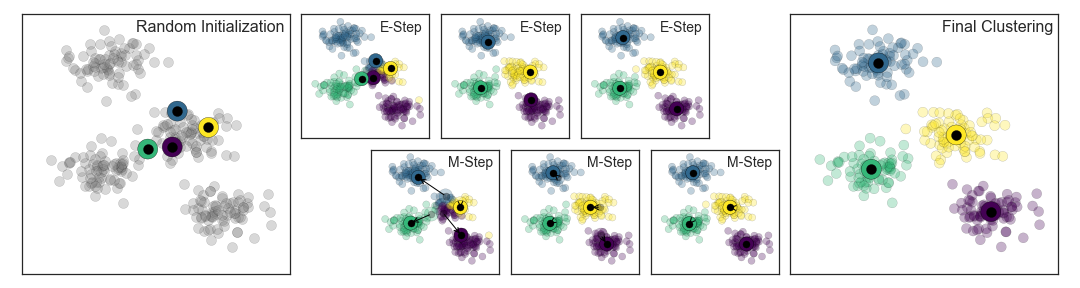

The *k*-Means algorithm is simple enough that we can write it in a few lines of code.
The following is a very basic implementation:

In [5]:
X.shape

(300, 2)

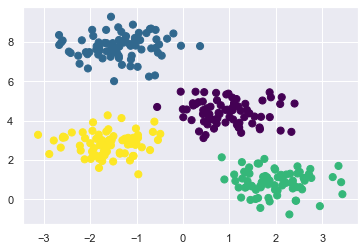

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2): # x, number of clusters, random
    
    # 1. Randomly choose clusters centers
    rng = np.random.RandomState(rseed) # Random num gen
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
    i = rng.permutation(X.shape[0])[:n_clusters] # X.shape returns (300, 2), X.shape[0] returns 300
    # Random order of all the points
    centers = X[i]
    
    while True: # Continue until you have the centers (EM step)
        # 2a. Assign labels based on closest center
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
        # pairwise_distances_argmin computes minimum distances between one point and a set of points.
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        # https://numpy.org/devdocs/reference/generated/numpy.matrix.mean.html
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        # https://numpy.org/doc/stable/reference/generated/numpy.all.html
        # Test whether all array elements along a given axis evaluate to True
        
        if np.all(centers == new_centers): # If center doesnt change -> break (it has converged)
            break
        centers = new_centers # M step- update the new center until it converges and breaks away
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### There are a few issues to be aware of when using the expectation–maximization algorithm.

#### The globally optimal result may not be achieved
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

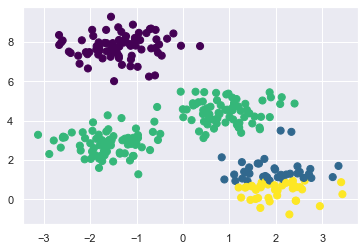

In [7]:
centers, labels = find_clusters(X, 4, rseed=0) # Change seed from 2 to 0
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');



# CAN NOT guarentee global max, only local max

Here the E–M approach has converged, but has not converged to a globally optimal configuration. 

**For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).**

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### The number of clusters must be selected beforehand
Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.
For example, if we ask the algorithm to identify six clusters, it will find the best six clusters:

/Users/sarahchambers/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


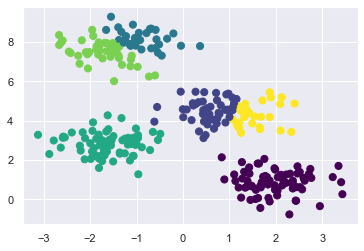

In [8]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Alternatively, you might use a more complicated clustering algorithm which has a better quantitative measure of the fitness per number of clusters or which *can* choose a suitable number of clusters (e.g., DBSCAN available in the ``sklearn.cluster`` submodule: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### k-means is limited to linear cluster boundaries
The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical *k*-means approach:

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/Users/sarahchambers/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


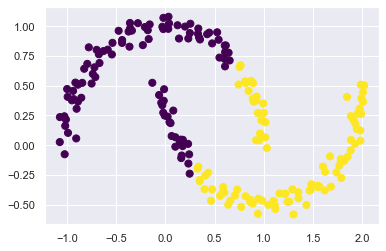

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

This situation also appears in Support Vector Machines, where a kernel transformation is used to project the data into a higher dimension where a linear separation is possible.
We might imagine using the same trick to allow *k*-means to discover non-linear boundaries.

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm:

/Users/sarahchambers/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


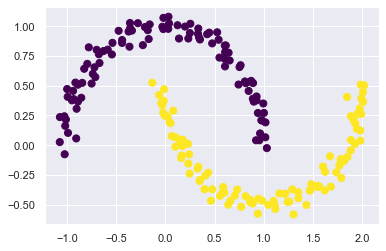

In [11]:
# Need to separate in 3D space (kernal)- it can only be separeated linearly

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

#### k-means can be slow for large numbers of samples
Because each iteration of *k*-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.

You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.
This is the idea behind batch-based *k*-means algorithms, one form of which is implemented in ``sklearn.cluster.MiniBatchKMeans``.


## K-means Examples


### Example 1: k-means on digits

Let's take a look at applying *k*-means on the UCI ML hand-written digits dataset.

Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *priori* label information.


### UCI ML hand-written digits dataset

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

The digits dataset consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image. 

Each sample is a 8x8 image of a digit.
- Classes: 10
- Samples per class: ~180
- Samples total: 1797
- Dimensionality: 64
- Features: integers 0-16

We will start by loading the digits and then finding the ``KMeans`` clusters.

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# 1,767 - samples
# 64 - attributes

(1797, 64)

In [13]:
print(digits.data[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


The clustering can be performed as:

In [14]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/Users/sarahchambers/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

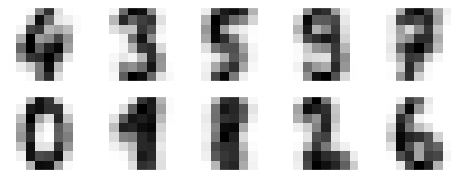

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) # 2 row, 5 column, and the fig size
centers = kmeans.cluster_centers_.reshape(10, 8, 8)  
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in them:

In [16]:
# https://en.wikipedia.org/wiki/SciPy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
from scipy.stats import mode

# https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html
# Return an array of zeros with the same shape and type as a given array
labels = np.zeros_like(clusters) # Begin a vector to store stuff- starting with all 0's
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # Majority label for the image and assign it to the first spot
# digits.target are the original labels of these digit datapoints

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels) # Only using linear clustering you can get 80% accuracy 

0.7935447968836951

With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this:

Text(89.18, 0.5, 'predicted label')

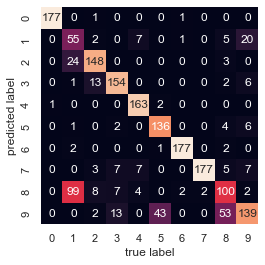

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels) # Heat map
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!


### Example 2: *k*-means for color compression

One interesting application of clustering is in color compression within images.
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following:

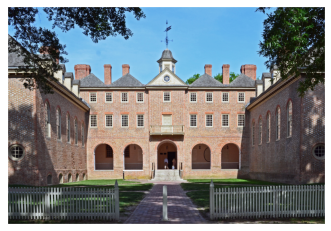

In [20]:
import imageio as iio
wren = iio.imread("Wren.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(wren);

The image itself is stored in a three-dimensional array of size ``(height, width, RGB)``, containing red/blue/green contributions as integers from 0 to 255:

In [21]:
wren.shape

(2644, 3860, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to ``[n_samples x n_features]``, and rescale the colors so that they lie between 0 and 1:

In [22]:
data = wren / 255.0 # use 0...1 scale
data = data.reshape(2644 * 3860, 3)
data.shape

(10205840, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [25]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    
    i = rng.permutation(data.shape[0])[:N] # shuffle pixcels and take 10,000 from the 10 million (.1%)
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

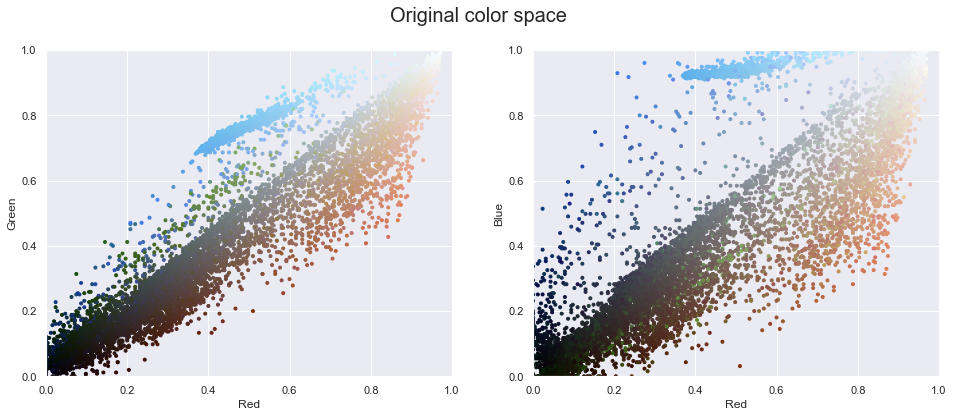

In [26]:
plot_pixels(data, title='Original color space')

Let's reduce the original colors to just 16 colors, using a *k*-means clustering across the pixel space.
Because we are dealing with a very large dataset, we will use the mini batch *k*-means, which operates on subsets of the data to compute the result much more quickly than the standard *k*-means algorithm:

/Users/sarahchambers/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


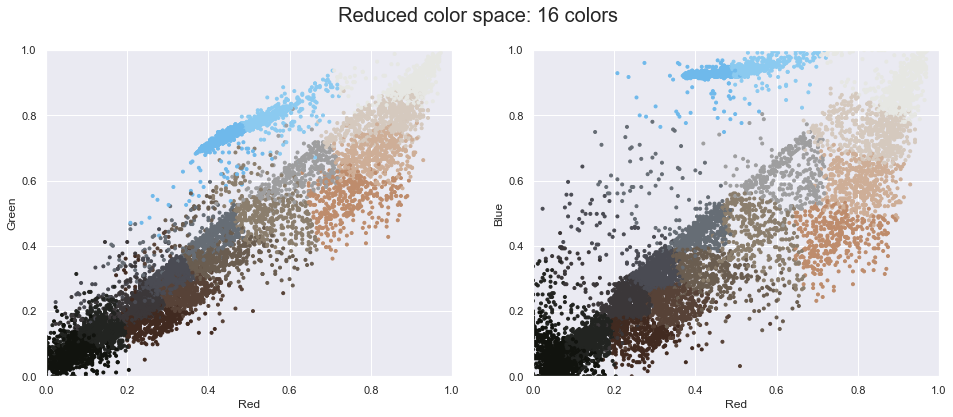

In [27]:
#import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

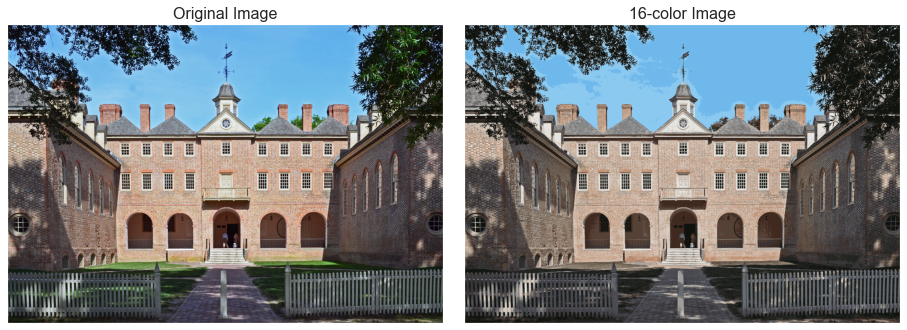

In [28]:
wren_recolored = new_colors.reshape(wren.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(wren)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(wren_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the right panel, but the overall image is still easily recognizable.
This image on the right is a compression and needs much less storage space.